In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import pickle

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.layers import BatchNormalization





In [0]:
with open('drive/My Drive/Vision_task_dataset_public/train_image.pkl', 'rb') as f:
  train_image = pickle.load(f)
  
with open('drive/My Drive/Vision_task_dataset_public/train_label.pkl', 'rb') as f:
  train_label = pickle.load(f)

In [0]:
train_image = np.array(train_image, dtype='float32')
train_label = np.array(train_label, dtype='float32')

In [75]:
print(f"Total number of images in dataset are: {train_image.shape[0]}")

Total number of images in dataset are: 8000


In [0]:
data = pd.DataFrame(train_image)

In [77]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,119.0,114.0,130.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,142.0,200.0,...,120.0,110.0,158.0,18.0,0.0,3.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,91.0,80.0,46.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [78]:
data['label'] = train_label
data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,114.0,130.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,142.0,200.0,...,110.0,158.0,18.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,80.0,46.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [79]:
data['label'].value_counts()

6.0    2000
3.0    2000
2.0    2000
0.0    2000
Name: label, dtype: int64

In [0]:
from sklearn.utils import shuffle
data = shuffle(data).reset_index(drop=True)

In [0]:
imgs = data.drop(['label'], axis=1)
labels = data['label']

In [82]:
imgs.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,2.0,0.0,0.0,132.0,142.0,55.0,0.0,0.0,0.0
1,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,154.0,167.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,29.0,31.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,87.0,95.0,112.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,138.0,...,180.0,195.0,166.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [83]:
labels.head()

0    6.0
1    0.0
2    6.0
3    3.0
4    0.0
Name: label, dtype: float32

In [0]:
imgs = imgs/255.0

In [85]:
imgs.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.003922,0.000000,0.000000,0.000000,...,0.003922,0.007843,0.000000,0.000000,0.517647,0.556863,0.215686,0.0,0.0,0.0
1,0.0,0.0,0.0,0.007843,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.603922,0.654902,0.274510,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.113725,0.121569,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.003922,0.003922,0.003922,0.000000,0.000000,...,0.341176,0.372549,0.439216,0.317647,0.000000,0.000000,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.098039,0.541176,...,0.705882,0.764706,0.650980,0.000000,0.000000,0.003922,0.000000,0.0,0.0,0.0


In [0]:
labels = labels.map({0: 0, 2: 1, 3: 2, 6: 3})
labels = np.array(pd.get_dummies(labels))

In [87]:
labels

array([[0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       ...,
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 0, 1]], dtype=uint8)

In [0]:
imgs = np.array(imgs).reshape(-1, 28, 28, 1)

In [89]:
imgs.shape

(8000, 28, 28, 1)

In [0]:
x_train, x_val, y_train, y_val = train_test_split(imgs, labels, test_size=0.15, random_state=42)

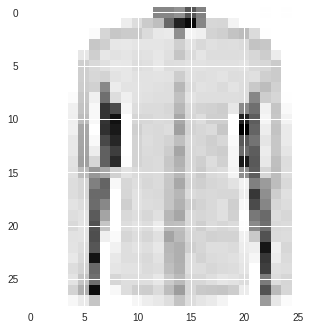

In [91]:
plt.imshow(x_train[100].reshape((28,28)))

In [0]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), padding='Same', activation='relu', input_shape=(28,28,1)),
    BatchNormalization(),
    Conv2D(filters=32, kernel_size=(3,3), padding='Same', activation='relu'),
    BatchNormalization(),
    Conv2D(filters=32, kernel_size=(3,3), padding='Same', activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.2),
    
    Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'),
    BatchNormalization(),
    Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'),
    BatchNormalization(),
    Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Dropout(0.2),

    Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'),
    BatchNormalization(),
    Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'),
    BatchNormalization(),
    Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Dropout(0.2),
    
    Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'),
    BatchNormalization(),
    Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'),
    BatchNormalization(),
    Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Dropout(0.2),
    
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.1),
    Dense(4, activation='softmax')
    
])

In [93]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_25 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_26 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_27 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
__________

In [0]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
# import keras
# optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0, amsgrad=False)

In [0]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

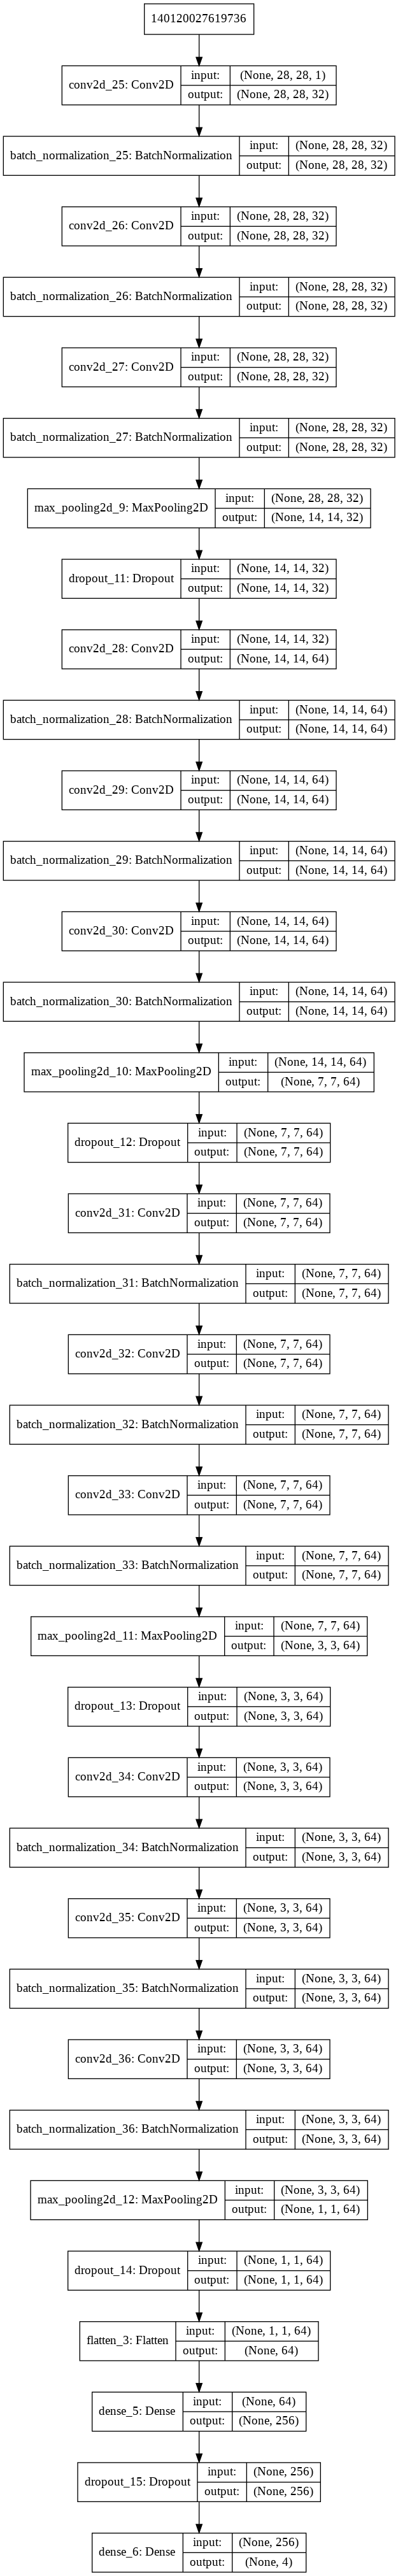

In [96]:
from IPython.display import Image
Image('model_plot.png')


In [0]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                           patience=3,
                                           verbose=2,
                                           factor=0.5,
                                           min_lr=0.00001)

In [0]:
epochs = 25
batch_size = 86

In [0]:
# from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
# early_stopping_monitor = EarlyStopping(patience=5, verbose=2)
#train model
# model.fit(train_X, train_y, validation_split=0.2, epochs=30, callbacks=[early_stopping_monitor])

In [0]:
datagen = ImageDataGenerator(featurewise_center=False,
                            samplewise_center=False,
                            featurewise_std_normalization=False,
                            samplewise_std_normalization=False,
                            zca_whitening=False,
                            rotation_range=0,
                            zoom_range=0.01,
                            width_shift_range=0.03,
                            height_shift_range=0.03,
                            horizontal_flip=False,
                            vertical_flip=False)
datagen.fit(x_train)

In [102]:
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                             epochs=epochs,
                             validation_data=(x_val, y_val),
                             verbose=2,
                             steps_per_epoch = x_train.shape[0]//batch_size,
                             callbacks=[learning_rate_reduction])

Epoch 1/25
 - 7s - loss: 0.9027 - acc: 0.6052 - val_loss: 0.9579 - val_acc: 0.7067
Epoch 2/25
 - 4s - loss: 0.6597 - acc: 0.7252 - val_loss: 2.0963 - val_acc: 0.6500
Epoch 3/25
 - 4s - loss: 0.5416 - acc: 0.7846 - val_loss: 1.8360 - val_acc: 0.6500
Epoch 4/25
 - 4s - loss: 0.4908 - acc: 0.8129 - val_loss: 0.5806 - val_acc: 0.8008
Epoch 5/25
 - 4s - loss: 0.4405 - acc: 0.8333 - val_loss: 0.4338 - val_acc: 0.8500
Epoch 6/25
 - 4s - loss: 0.4108 - acc: 0.8361 - val_loss: 0.5793 - val_acc: 0.8225
Epoch 7/25
 - 4s - loss: 0.3812 - acc: 0.8502 - val_loss: 0.3895 - val_acc: 0.8683
Epoch 8/25
 - 4s - loss: 0.3548 - acc: 0.8607 - val_loss: 0.4142 - val_acc: 0.8650
Epoch 9/25
 - 4s - loss: 0.3455 - acc: 0.8663 - val_loss: 0.3913 - val_acc: 0.8625
Epoch 10/25
 - 4s - loss: 0.3318 - acc: 0.8700 - val_loss: 0.4223 - val_acc: 0.8667

Epoch 00010: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 11/25
 - 4s - loss: 0.2876 - acc: 0.8891 - val_loss: 0.3823 - val_acc: 0.8625
Epoc

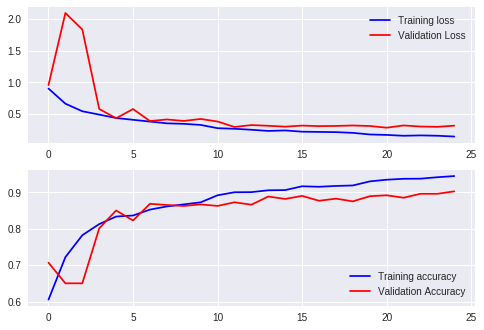

In [103]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label='Training loss')
ax[0].plot(history.history['val_loss'], color='r', label='Validation Loss', axes=ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label='Training accuracy')
ax[1].plot(history.history['val_acc'], color='r', label='Validation Accuracy')
legend = ax[1].legend(loc='best', shadow='True')

In [0]:
y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true = np.argmax(y_val, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

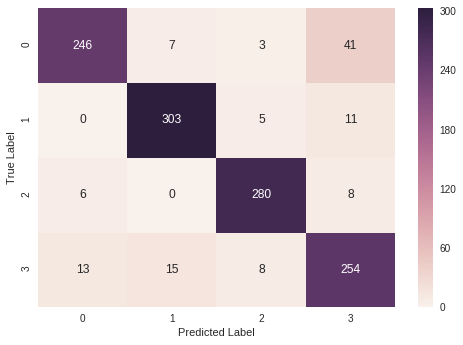

In [106]:
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [0]:
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
# activations = activation_model.predict(x_train[10].reshape(1,28,28,1))
 
def display_activation(i, col_size, row_size, act_index): 
    activations = activation_model.predict(x_train[i].reshape(1,28,28,1))
    plt.imshow(x_train[i].reshape((28,28)))
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

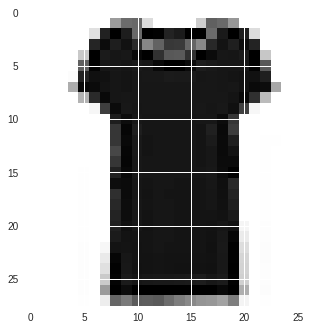

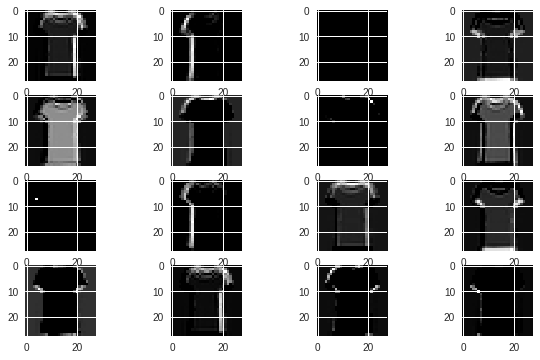

In [108]:
display_activation(10, 4, 4, 0)



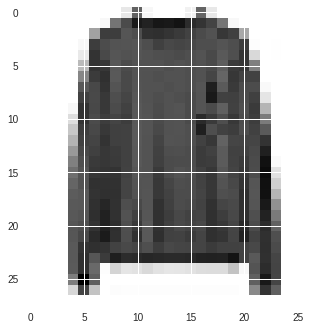

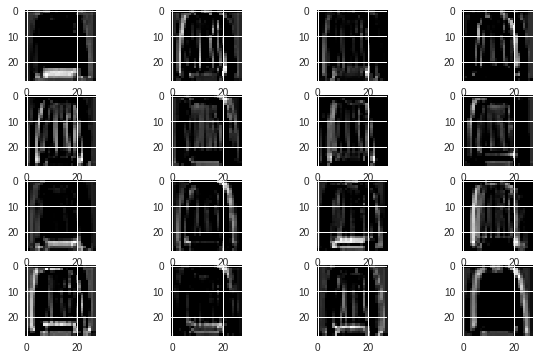

In [109]:
display_activation(1000, 4, 4, 5)

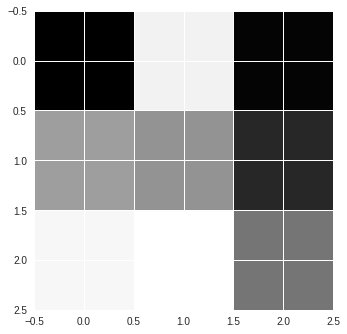

In [114]:
plt.imshow(model.layers[0].get_weights()[0][:, :, :, 0].squeeze(), cmap='gray')


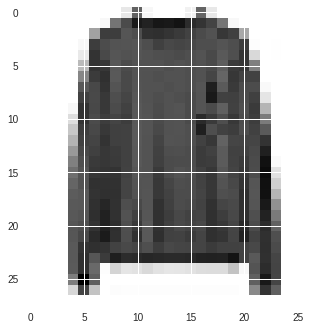

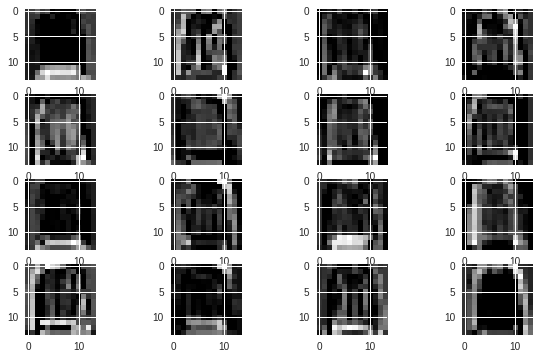

In [115]:
display_activation(1000, 4, 4, 6)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide


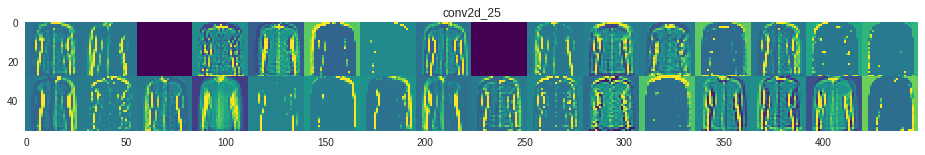

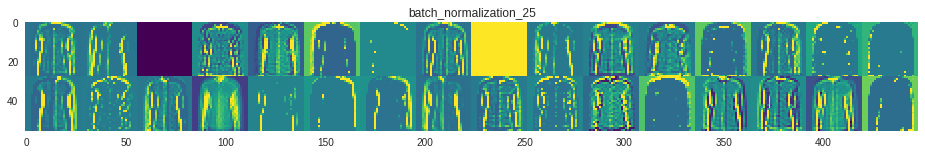

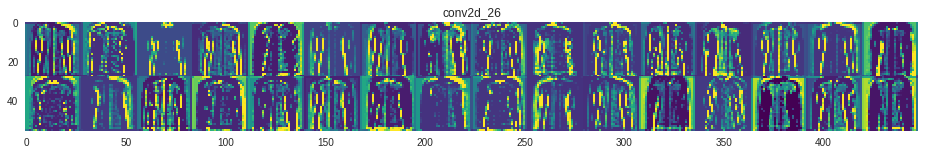

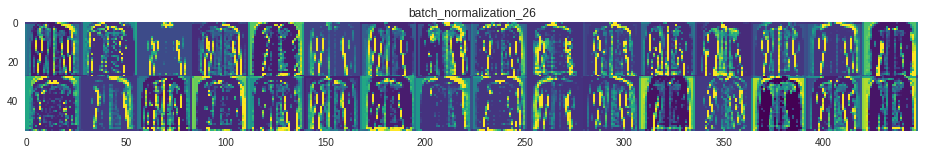

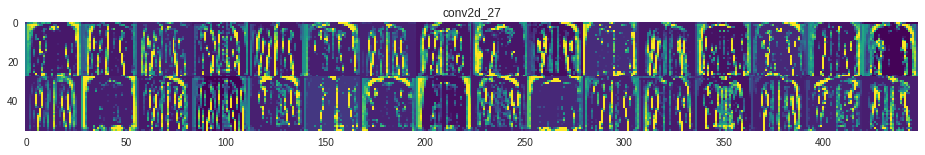

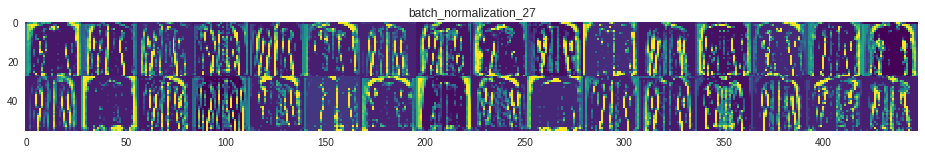

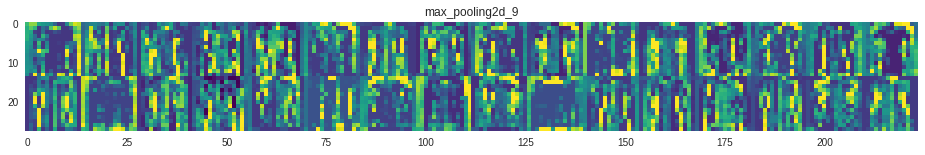

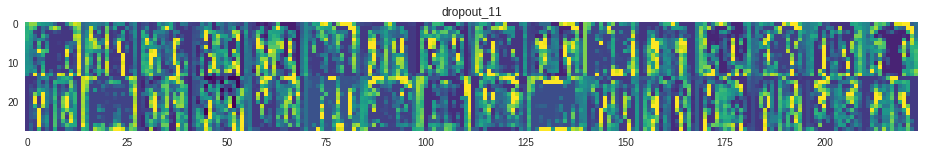

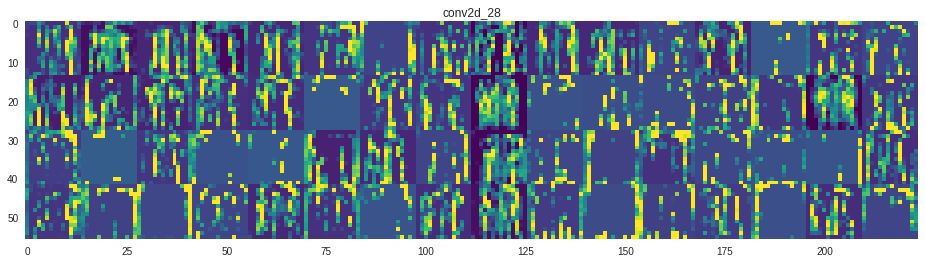

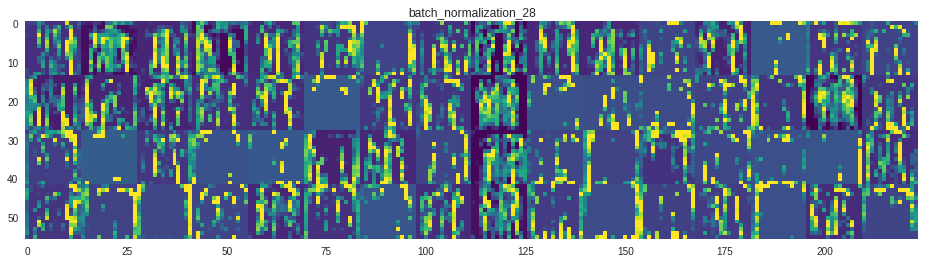

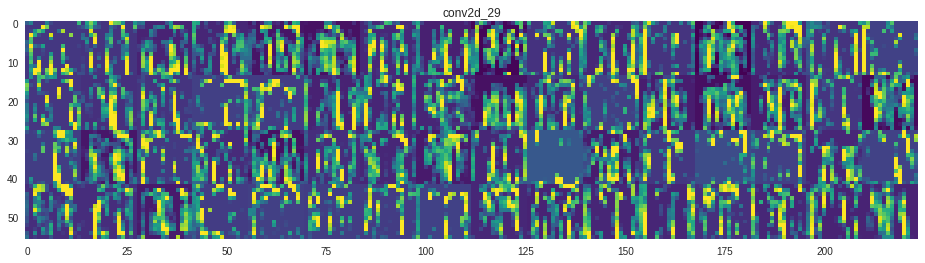

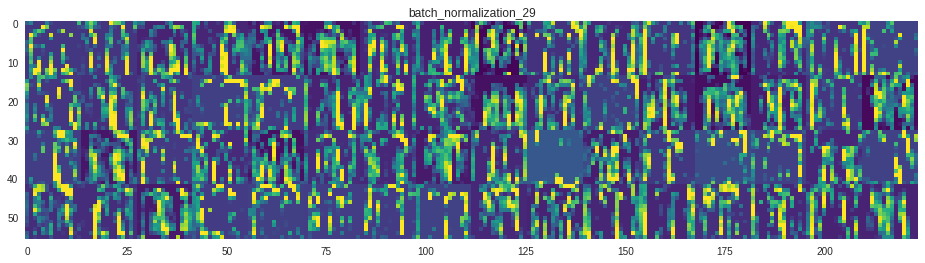

In [117]:
layer_names = []
for layer in model.layers[:12]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16
activations = activation_model.predict(x_train[100].reshape(1,28,28,1))

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [118]:
y_pred_classes.shape

(1200,)

In [119]:
x_val.shape

(1200, 28, 28, 1)

In [0]:
with open('drive/My Drive/Vision_task_dataset_public/test_image.pkl', 'rb') as f:
  test_image = pickle.load(f)

In [0]:
test = (np.array(test_image).reshape(-1, 28, 28, 1))/255.0

In [133]:
test.shape

(2000, 28, 28, 1)

In [0]:
results = model.predict(test)

In [0]:
results = np.argmax(results, axis=1)

In [0]:
test_results = pd.DataFrame(test_image)

In [137]:
test_results.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,52,...,187,173,148,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,74,...,105,15,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,34,33,14,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,18,...,54,51,63,34,0,1,0,0,0,0
4,0,0,0,0,0,0,0,26,64,134,...,41,41,37,35,36,36,0,0,0,0


In [138]:
test_results.shape

(2000, 784)

In [0]:
test_results['class'] = results

In [143]:
test_results.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,class
0,0,0,0,0,0,0,0,0,0,52,...,173,148,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,74,...,15,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,33,14,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,18,...,51,63,34,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,26,64,134,...,41,37,35,36,36,0,0,0,0,0


In [145]:
test_results['class'].nunique()

4

In [146]:
test_results['class'].unique()

array([0, 3, 1, 2])

In [147]:
test_results['class'].value_counts()

1    526
3    520
2    488
0    466
Name: class, dtype: int64

In [0]:
test_results['class'] = test_results['class'].map({
    0: 0,
    1: 2,
    2: 3,
    3: 6
})

In [149]:
test_results.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,class
1033,0,0,0,0,0,0,0,0,0,0,...,89,0,0,0,0,0,0,0,0,3
1419,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,3
1400,0,0,0,0,0,0,0,0,0,0,...,0,4,0,0,0,0,0,0,0,3
1819,0,0,0,0,0,0,1,5,0,0,...,137,110,77,18,0,0,0,0,0,6
125,0,0,0,0,0,1,0,1,0,0,...,69,92,43,0,0,0,0,0,0,6


In [150]:
test_results['class'].unique()

array([0, 6, 2, 3])

In [0]:
submission = pd.DataFrame()

In [0]:
submission['image_index'] = test_results.index

In [0]:
submission['class'] = test_results['class']

In [155]:
submission.sample(5)

,image_index,class
739,739,2
717,717,2
534,534,6
265,265,2
72,72,0


In [0]:
submission.to_csv('anmolgoel.csv')